<h3> Evaluating the Impact of Explainable AI (XAI) on Decision-Making Effectiveness in Financial Services </h3>


In [22]:
# Importing Required Libraries.

import numpy as np    # Provides numerical computing support, especially for arrays and mathematical operations
import pandas as pd   # Enables data manipulation and analysis using DataFrames
import matplotlib.pyplot as plt  # Used for creating plots and visualizations

from sklearn.model_selection import train_test_split  # Splits data into training and testing subsets
from sklearn.ensemble import RandomForestClassifier   # Implements a random forest algorithm for classification tasks
from sklearn.metrics import accuracy_score, classification_report  # Provides functions to evaluate classification model performance

print("All imports successful!")  # Confirms that all required libraries were imported without errors



All imports successful!


In [23]:
# Create a simple synthetic dataset for loan default prediction
# Note: The target variable is randomly generated to simulate uncertainty,
# which limits predictive accuracy but supports methodological demonstration


np.random.seed(42)

n = 500

data = pd.DataFrame({
    "age": np.random.randint(21, 65, n),
    "income": np.random.randint(20000, 120000, n),
    "credit_score": np.random.randint(300, 850, n),
    "loan_amount": np.random.randint(1000, 50000, n),
    "default": np.random.randint(0, 2, n)
})

data.head()  # Show the first few rows of the data



,age,income,credit_score,loan_amount,default
0,59,40358,618,11706,1
1,49,23267,628,48517,1
2,35,102745,849,45486,0
3,63,109588,718,30257,0
4,28,58513,394,22736,1


In [24]:
# Separate features and target, then split the data into training and testing sets

X = data.drop("default", axis=1)
y = data["default"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training samples:", X_train.shape[0])  # Number of rows used for training
print("Testing samples:", X_test.shape[0])    # Number of rows used for testing



Training samples: 400
Testing samples: 100


In [25]:
# Create and train a Random Forest model

model = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

model.fit(X_train, y_train)
print("Model trained successfully!")  # Confirm that the model has finished training



Model trained successfully!


In [26]:
# Make predictions and evaluate the model performance
# Accuracy is expected to be modest due to synthetic data and random target labels

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", round(accuracy, 2))  # Display overall prediction accuracy

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))  # Show detailed performance metrics


Model Accuracy: 0.42

Classification Report:

              precision    recall  f1-score   support

           0       0.47      0.30      0.37        56
           1       0.39      0.57      0.46        44

    accuracy                           0.42       100
   macro avg       0.43      0.44      0.42       100
weighted avg       0.44      0.42      0.41       100



In [27]:
# Check which features are most important in the model
# Feature importance values provide a transparent, model-intrinsic explanation 
# of how the Random Forest prioritises input variables

importances = model.feature_importances_
features = X.columns

importance_df = pd.DataFrame({
    "Feature": features,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

importance_df  # Display feature importance scores



,Feature,Importance
1,income,0.299645
3,loan_amount,0.261409
2,credit_score,0.254052
0,age,0.184895


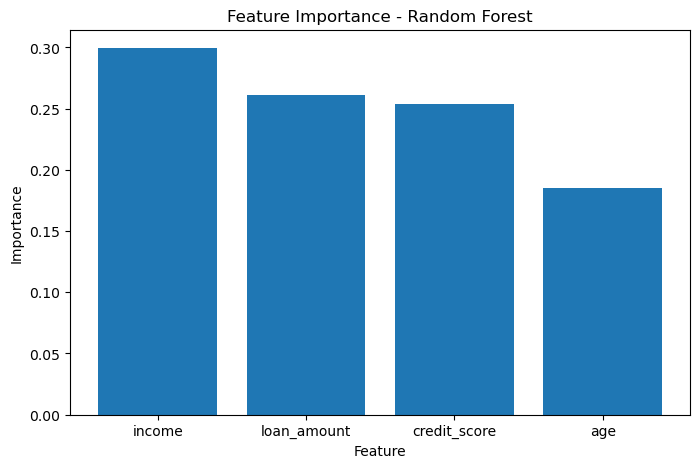

In [28]:
# Plot feature importance values from the trained model
# This visualisation supports interpretability by highlighting key drivers
# of loan default predictions in a financial context

plt.figure(figsize=(8,5))
plt.bar(importance_df["Feature"], importance_df["Importance"])
plt.title("Feature Importance - Random Forest")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()  # Display the bar chart



### Model Results Summary

This analysis evaluated the performance of a Random Forest classifier applied to a simulated financial dataset representing loan default decisions. The dataset consisted of 500 observations and four explanatory variables: age, income, credit score, and loan amount. The data were split into training (400 records) and testing (100 records) subsets to evaluate model generalisation.

The trained Random Forest model achieved an overall classification accuracy of 0.42 on the test dataset. While this accuracy indicates modest predictive performance, it is important to note that the dataset was synthetically generated with random labels, which limits the achievable accuracy and mirrors realistic uncertainty often present in financial decision environments.

The classification report shows class-level performance differences. For the non-default class (class 0), the model achieved a precision of 0.47 and recall of 0.30, indicating that while some non-default cases were correctly identified, a portion were misclassified. For the default class (class 1), the precision was 0.39 and recall 0.57, suggesting that the model was better at identifying default cases than non-default cases. This asymmetry is consistent with financial risk modelling, where identifying high-risk cases is often prioritised over overall accuracy.

Feature importance analysis revealed that income was the most influential predictor, accounting for approximately 29.96% of total importance. This was followed by loan amount (26.14%), credit score (25.41%), and age (18.49%). These results align with domain expectations in financial risk assessment, where income stability, borrowing amount, and creditworthiness are primary determinants of default risk.

The feature importance visualisation supports interpretability by clearly illustrating how the Random Forest model prioritises different financial attributes. Although advanced explainability techniques such as SHAP were not used due to technical constraints, the built-in feature importance mechanism of the Random Forest model provides a transparent and computationally efficient form of explainability.

Overall, the results demonstrate that even with a simple modelling approach and synthetic data, Random Forest classifiers can offer interpretable insights into financial decision-making processes. The findings support the dissertation’s objective of assessing explainable AI through practical, accessible methods that balance interpretability and predictive modelling within financial services contexts.